# Murugiah_NavinKarthik_Assignment1

### Github Link : 

** 1) Load in the appropriate csv file as a pandas dataframe (batting.csv) **

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
df = pd.read_csv('Batting.csv')

** 2) Print out the dimensions and info about the dataframe you just created **

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

** 3) How many players have hit 40 or more HRs in one single season? (Number only) **

In [45]:
q3 = df.groupby(by=['yearID','playerID'],as_index=False).sum()
q3[q3['HR']>=40]['playerID'].nunique()

142

** 4) How many players have hit more than 600 HRs for their career? (Dataframe) **

In [63]:
q4 = df.groupby(by=['playerID'],as_index=False)[['HR']].sum()
pd.DataFrame(q4[q4['HR']>600].count(),columns=['Count'])
pd.DataFrame(q4[q4['HR']>600]['playerID'].unique())

,0
0,aaronha01
1,bondsba01
2,griffke02
3,mayswi01
4,rodrial01
5,ruthba01
6,sosasa01
7,thomeji01


** 5) How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only) **

In [54]:
q5 = df.groupby(by=['yearID','playerID'],as_index=False).sum()
q5[(q5['2B']>=40) & (q5['3B']>=10) & (q5['H']>=200) & (q5['HR']>=30)].nunique()['playerID']

11

**6) How many players have had 100 or more SBs in a season? (Dataframe) ** 


In [90]:
q6 = df.groupby(['yearID','playerID'],as_index=False)[['SB']].sum()
pd.DataFrame(q6[q6['SB']>=100].nunique()) #count
pd.DataFrame(q6[q6['SB']>=100]['playerID'].unique())

,0
0,brownpe01
1,comisch01
2,fogarji01
3,lathaar01
4,nicolhu01
5,wardjo01
6,hamilbi01
7,brownto01
8,willsma01
9,brocklo01


** 7)	How many players in the 1960s have hit more than 200 HRs? (Dataframe) **

In [97]:
q7 = df[df.yearID.isin(range(1960,1970))].groupby(by=(['playerID']),as_index=False)[['HR']].sum()
pd.DataFrame(q7[q7['HR']>200].count(),columns=(['Count']))
pd.DataFrame(q7[q7['HR']>200]['playerID'].unique())

,0
0,aaronha01
1,allisbo01
2,bankser01
3,cashno01
4,cepedor01
5,colavro01
6,howarfr01
7,kalinal01
8,killeha01
9,mantlmi01


** 8) Who has hit the most HRs in history? (Dataframe) **

In [65]:
q8 = df.groupby(by=['playerID','nameFirst','nameLast']).sum()
q8.reset_index(inplace=True)
q8[q8["HR"]==q8.HR.max()]

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
1542,bondsba01,Barry,Bonds,43208,43923,22,2986,9847,2227,2935,...,2558,1539.0,688.0,106.0,4.0,91.0,165.0,13188.0,14.335937,6.562727


**9) Who had the most hits in the 1970s? (Dataframe) **

In [66]:
q9 = df[df.yearID.isin (range(1970,1980))].groupby(by=['playerID','nameFirst','nameLast']).sum()
q9.reset_index(inplace=True)
q9[q9['H']==q9.H.max()]

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
1639,rosepe01,Pete,Rose,19410,19745,10,1604,6523,1068,2045,...,783,464.0,87.0,50.0,9.0,34.0,111.0,7436.0,4.536266,3.134102


** 10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe) **

In [73]:
df['PA'] = (df['AB']+df['BB']+df['IBB']+df['SH']+df['SF'])
df['OBP'] = (df['H']+df['BB']+df['IBB']+df['SH']+df['SF'])/df['AB']
df[(df['yearID']==1997) & (df['PA']>=500)]['stint'].sum() #To check if stint = 1
df[(df['PA']>=500) & (df['yearID']==1977)].sort_values(['OBP'],ascending=False).head(5)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP
55273,singlke01,Ken,Singleton,1947,1977,1,BAL,AL,152,536,...,1.0,107,101.0,13.0,2.0,0.0,6.0,15.0,662.0,0.563433
55280,smithre06,Reggie,Smith,1945,1977,1,LAN,NL,148,488,...,5.0,104,76.0,11.0,3.0,1.0,7.0,5.0,611.0,0.559426
55329,tenacge01,Gene,Tenace,1946,1977,1,SDN,NL,147,437,...,3.0,125,119.0,10.0,13.0,2.0,4.0,5.0,578.0,0.556064
54820,hargrmi01,Mike,Hargrove,1949,1977,1,TEX,AL,153,525,...,5.0,103,59.0,7.0,6.0,8.0,6.0,13.0,649.0,0.540952
54603,carewro01,Rod,Carew,1945,1977,1,MIN,AL,155,616,...,13.0,69,55.0,15.0,3.0,1.0,5.0,6.0,706.0,0.534091


** 11) Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)**

In [75]:
df['average']=df['H']/df['AB']
df[(df['yearID']==2013) & (df['PA']>=300)].sort_values(['average'],ascending=False).head(8)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
97188,cabremi01,Miguel,Cabrera,1983,2013,1,DET,AL,148,555,...,90,94.0,19.0,5.0,0.0,2.0,19.0,666.0,0.547748,0.347748
98062,ramirha01,Hanley,Ramirez,1983,2013,1,LAN,NL,86,304,...,27,52.0,3.0,3.0,0.0,2.0,5.0,336.0,0.450658,0.345395
97300,cuddymi01,Michael,Cuddyer,1979,2013,1,COL,NL,130,489,...,46,100.0,5.0,2.0,0.0,3.0,13.0,543.0,0.441718,0.331288
97825,mauerjo01,Joe,Mauer,1983,2013,1,MIN,AL,113,445,...,61,89.0,7.0,0.0,0.0,2.0,7.0,515.0,0.480899,0.323596
98293,troutmi01,Mike,Trout,1991,2013,1,LAA,AL,157,589,...,110,136.0,10.0,9.0,0.0,8.0,8.0,717.0,0.539898,0.322581
97651,johnsch05,Chris,Johnson,1984,2013,1,ATL,NL,142,514,...,29,116.0,5.0,2.0,0.0,2.0,20.0,550.0,0.391051,0.321012
97437,freemfr01,Freddie,Freeman,1989,2013,1,ATL,NL,147,551,...,66,121.0,10.0,7.0,0.0,5.0,10.0,632.0,0.466425,0.319419
98043,puigya01,Yasiel,Puig,1990,2013,1,LAN,NL,104,382,...,36,97.0,6.0,11.0,0.0,3.0,6.0,427.0,0.437173,0.319372


** 12) Leaders in hits from 1940 up to and including 1949. (Dataframe) **

In [71]:
q12 = df[df.yearID.isin(range(1940,1950))].groupby(['playerID','nameFirst','nameLast']).sum()
q12.reset_index().sort_values(['H'],ascending=False).head(10)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
138,boudrlo01,Lou,Boudreau,19170,19445,10,1425,5268,758,1578,...,706,268.0,0.0,27.0,153.0,0.0,131.0,0.0,0.0,2.994483
427,elliobo01,Bob,Elliott,19160,19445,10,1455,5361,803,1563,...,728,418.0,0.0,11.0,56.0,0.0,135.0,0.0,0.0,2.908353
1576,walkedi02,Dixie,Walker,19100,19445,10,1363,4856,704,1512,...,597,204.0,0.0,13.0,50.0,0.0,70.0,0.0,0.0,3.090688
1103,musiast01,Stan,Musial,15360,15560,8,1072,4133,815,1432,...,565,199.0,0.0,21.0,28.0,0.0,82.0,0.0,0.0,2.835509
390,doerrbo01,Bobby,Doerr,17262,17500,9,1283,4924,764,1407,...,570,437.0,0.0,7.0,67.0,0.0,134.0,0.0,0.0,2.580115
712,holmeto01,Tommy,Holmes,15336,15564,8,1157,4605,651,1402,...,440,106.0,0.0,20.0,65.0,0.0,85.0,0.0,0.0,2.418779
33,applilu01,Luke,Appling,17163,17501,9,1188,4417,613,1376,...,666,254.0,0.0,7.0,30.0,0.0,111.0,0.0,0.0,2.850520
1127,nichobi01,Bill,Nicholson,19140,19445,10,1389,4936,743,1328,...,721,708.0,0.0,48.0,16.0,0.0,55.0,0.0,0.0,2.643968
961,marioma01,Marty,Marion,19160,19445,10,1396,4941,550,1310,...,407,465.0,0.0,13.0,143.0,0.0,104.0,0.0,0.0,2.659385
239,cavarph01,Phil,Cavarretta,19160,19445,10,1217,4326,664,1304,...,604,355.0,0.0,21.0,62.0,0.0,63.0,0.0,0.0,2.983195


** 13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number) **

In [68]:
q13 = df.groupby(['playerID','yearID'],as_index=False)[['H']].sum()
q13.groupby(['yearID']).max().groupby('playerID').count().sort_values('H',ascending=False).head(1)

,H
playerID,
zimmech01,18


** 14) Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe **

In [78]:
df.groupby(by=['playerID','nameFirst','nameLast']).sum().reset_index().sort_values(['G'],ascending=False).head(5)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
14719,rosepe01,Pete,Rose,48525,49372,26,3562,14053,2165,4256,...,1566,1143.0,167.0,107.0,56.0,79.0,247.0,15921.0,10.843925,7.516937
18728,yastrca01,Carl,Yastrzemski,44597,45356,23,3308,11988,1816,3419,...,1845,1393.0,190.0,40.0,13.0,105.0,323.0,14141.0,10.655509,6.527357
1,aaronha01,Hank,Aaron,44482,45195,23,3298,12364,2174,3771,...,1402,1383.0,293.0,32.0,21.0,121.0,328.0,13695.0,10.029224,6.924731
7383,henderi01,Rickey,Henderson,56782,57754,33,3081,10961,2295,3055,...,2190,1694.0,61.0,98.0,30.0,67.0,172.0,13309.0,14.146079,7.803474
3155,cobbty01,Ty,Cobb,45264,45996,24,3035,11434,2246,4189,...,1249,357.0,0.0,94.0,295.0,0.0,0.0,0.0,0.000000,8.665088


** 15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here **

In [99]:
q15 = df.groupby(['playerID','nameFirst','nameLast']).sum().reset_index()
q15[(q15['H']>3000) & (q15['HR']>=500)]['playerID'].count()

5

** 16) How many HRs were hit during the entire 1988 season?  Just a number is okay here **

In [28]:
df[df.yearID == 1988]['HR'].sum()

3180

**17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average. **

In [76]:
df[(df['playerID']=='boggswa01') & (df['AB']>=500)].groupby(by=(['playerID','yearID'])).sum().reset_index().sort_values(by='average',ascending=False).head(3)

,playerID,yearID,birthYear,stint,G,AB,R,H,2B,3B,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
2,boggswa01,1985,1958,1,161,653,107,240,42,3,...,96,61.0,5.0,4.0,3.0,2.0,20.0,759.0,0.529862,0.367534
5,boggswa01,1988,1958,1,155,584,128,214,45,6,...,125,34.0,18.0,3.0,0.0,7.0,23.0,734.0,0.623288,0.366438
4,boggswa01,1987,1958,1,147,551,108,200,40,6,...,105,48.0,19.0,2.0,1.0,8.0,13.0,684.0,0.604356,0.362976


** 18) Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this**

In [77]:
df[(df['yearID']==1995) & (df['PA']>=400)].groupby(by=(['playerID','nameFirst','nameLast','yearID'])).sum().reset_index().sort_values(by='OBP',ascending=False).head(5)

,playerID,nameFirst,nameLast,yearID,birthYear,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
146,thomafr04,Frank,Thomas,1995,1968,1,145,493,102,152,...,136,74.0,29.0,6.0,0.0,12.0,14.0,670.0,0.667343,0.308316
103,martied01,Edgar,Martinez,1995,1963,1,145,511,121,182,...,116,87.0,19.0,8.0,0.0,4.0,11.0,650.0,0.628180,0.356164
107,mcgwima01,Mark,McGwire,1995,1963,1,104,317,75,87,...,88,77.0,5.0,11.0,0.0,6.0,9.0,416.0,0.586751,0.274448
18,bondsba01,Barry,Bonds,1995,1964,1,144,506,109,149,...,120,83.0,22.0,5.0,0.0,4.0,12.0,652.0,0.583004,0.294466
42,davisch01,Chili,Davis,1995,1960,1,119,424,81,135,...,89,79.0,12.0,0.0,0.0,9.0,12.0,534.0,0.577830,0.318396


** 19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader **

In [64]:
df[df['yearID'].isin([1922,1925,1926,1928])].groupby(by=['playerID']).sum().reset_index().sort_values(by='3B',ascending=False).head(1)

,playerID,birthYear,yearID,stint,G,AB,R,H,2B,3B,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
1011,walkecu01,7584,7701,4,571,2088,335,652,97,59,...,222,122.0,0.0,5.0,81.0,0.0,0.0,0.0,0.0,1.240789


** 20) How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here **


In [84]:
q20 = df.groupby(by=['yearID','playerID'],as_index=False).sum()
q20[(q20['HR']>=30) & (q20['SB']>=30)]['playerID'].nunique()

38

** 21) Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe) **


In [81]:
df[(df['yearID']==1986) & (df['PA']>=400)].sort_values(by='OBP',ascending=False).head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
63320,boggswa01,Wade,Boggs,1958,1986,1,BOS,AL,149,580,...,105,44.0,14.0,0.0,4.0,4.0,11.0,707.0,0.575862,0.356897


** 22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe) **


In [88]:
df[(df['yearID']==1997) & (df['PA']>=400) & (df['lgID']=='NL')].sort_values(by='OBP',ascending=False).head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
75505,bondsba01,Barry,Bonds,1964,1997,1,SFN,NL,159,532,...,145,87.0,34.0,8.0,0.0,5.0,13.0,716.0,0.637218,0.291353


** 23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe) **


In [127]:
q23 = df[df['yearID']==2012].groupby(by=(['lgID','playerID']),as_index=False)[['HR','PA']].sum()
q23.groupby(['lgID'])['HR'].mean()
q23[((q23['lgID']=='AL') & (q23['PA']>=500) & (q23['HR']>3.987241)) | ((q23['lgID']=='NL') & (q23['PA']>=500) & (q23['HR']>3.361878)) ]

,lgID,playerID,HR,PA
5,AL,ackledu01,12,675.0
24,AL,avilemi01,13,544.0
27,AL,aybarer01,8,549.0
41,AL,beckhgo01,16,575.0
43,AL,beltrad01,36,657.0
56,AL,brantmi02,6,621.0
69,AL,butlebi03,29,681.0
71,AL,cabreas01,16,613.0
72,AL,cabremi01,44,711.0
75,AL,callaal01,10,521.0


** 24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe) **


In [131]:
df['age']=df['yearID']-df['birthYear']
df[df['HR']>=50].sort_values(by=['age'])[['playerID','nameFirst','nameLast','birthYear','yearID','age','HR']].head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,age,HR
89082,fieldpr01,Prince,Fielder,1984,2007,23,50


** 25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe) **

In [201]:
from pprint import pprint
df['age']=df['yearID']-df['birthYear']
player_age = {}
q25 = df.groupby(by=['playerID'],as_index=False)[['HR']].sum()
q25 = q25[q25['HR']>=300]
for player in q25["playerID"].tolist():
    player_entries = df[df["playerID"] == player]
    hr_cnt = 0
    for entry in player_entries.iterrows():
        hr_cnt += entry[1]["HR"]
        if hr_cnt>=300:
            player_age[player] = entry[1]["age"]
            break

sorted_age = sorted(player_age.items(),key=lambda x:x[1])
pd.DataFrame(sorted_age[:5],columns=["playerID","age"])

,playerID,age
0,foxxji01,28
1,jonesan01,28
2,ottme01,28
3,pujolal01,28
4,rodrial01,28


** 26) Graph total HRs per season using bar graph **

Text(0.5,1,'Total Home runs per season between 1871 and 2016')

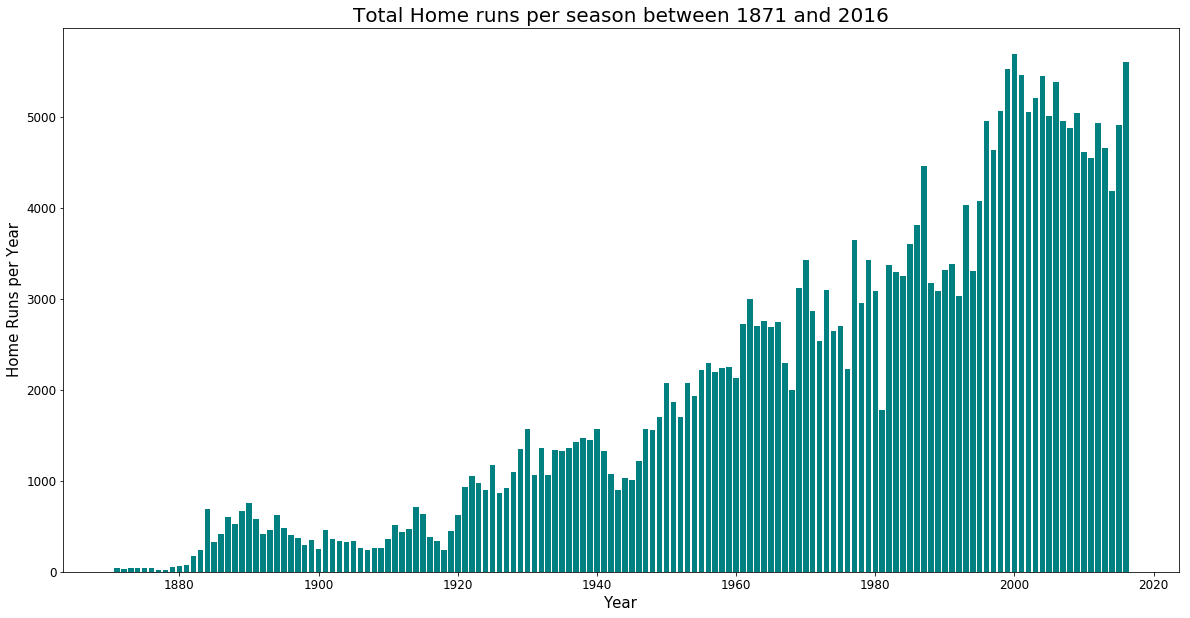

In [258]:
v1 = df.groupby(by=('yearID'))[['HR']].sum().reset_index()
plt.figure(figsize=(20,10))
c1 = plt.bar(v1['yearID'], v1['HR'],color='teal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Home Runs per Year',fontsize=15)
plt.title('Total Home runs per season between 1871 and 2016',fontsize=20)

** 27) Using a line graph please graph the average HRs per AB (think about this) per season **

Text(0.5,1,'Average Home Runs per At Bats per season between 1871 and 2016')

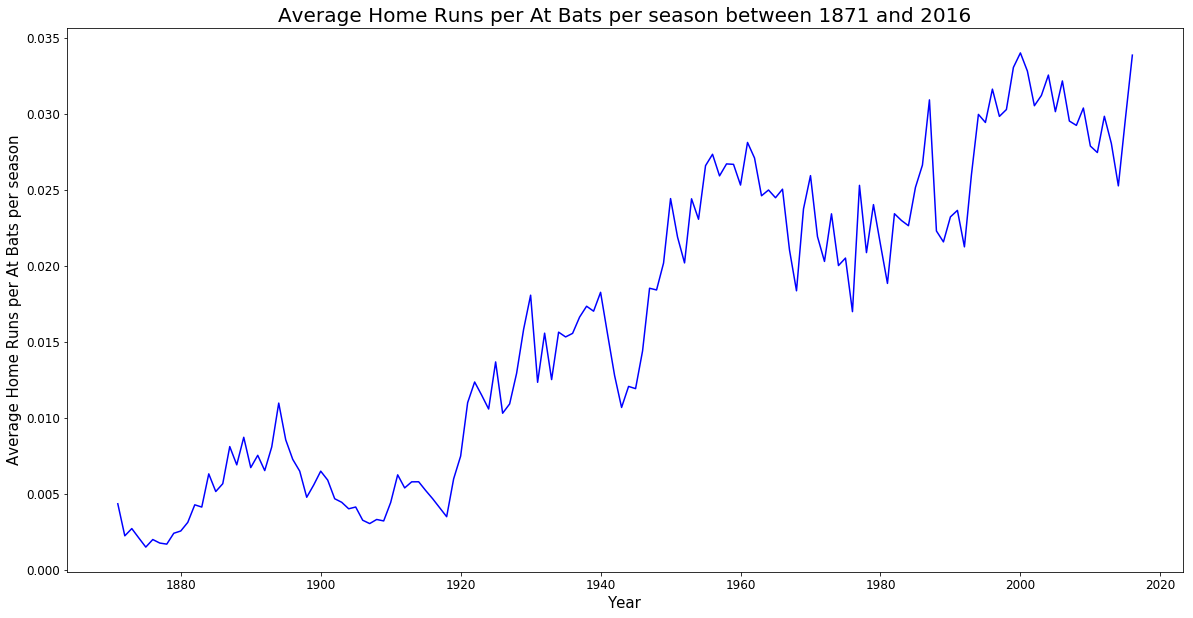

In [259]:
v2 = df.groupby(by=['yearID'],as_index=False).sum()
plt.figure(figsize=(20,10))
v2['HR_per_AB'] = v2['HR']/v2['AB']
c2 = plt.plot(v2['yearID'],v2['HR_per_AB'],color='blue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Average Home Runs per At Bats per season',fontsize=15)
plt.title('Average Home Runs per At Bats per season between 1871 and 2016',fontsize=20)